# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [301]:
pip install --upgrade plotly

Requirement already up-to-date: plotly in /Users/alina/opt/anaconda3/lib/python3.7/site-packages (5.5.0)
Note: you may need to restart the kernel to use updated packages.


## Import Statements

In [302]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [303]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [304]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

<h5>df_hh_income</h5>

In [305]:
df_hh_income.shape

(29322, 3)

In [306]:
df_hh_income.columns

Index(['Geographic Area', 'City', 'Median Income'], dtype='object')

In [307]:
df_hh_income.isna().sum()

Geographic Area     0
City                0
Median Income      51
dtype: int64

In [308]:
df_hh_income.duplicated().sum()

0

<h5>df_pct_poverty</h5>

In [309]:
df_pct_poverty.shape

(29329, 3)

In [310]:
df_pct_poverty.columns

Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')

In [311]:
df_pct_poverty.isna().sum()

Geographic Area    0
City               0
poverty_rate       0
dtype: int64

In [312]:
df_pct_poverty.duplicated().sum()

0

<h5>df_pct_completed_hs</h5>

In [313]:
df_pct_completed_hs.shape

(29329, 3)

In [314]:
df_pct_completed_hs.columns

Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')

In [315]:
df_pct_completed_hs.isna().sum()

Geographic Area         0
City                    0
percent_completed_hs    0
dtype: int64

In [316]:
df_pct_completed_hs.duplicated().sum()

0

<h5>df_share_race_city</h5>

In [317]:
df_share_race_city.shape

(29268, 7)

In [318]:
df_share_race_city.columns

Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')

In [319]:
df_share_race_city.isna().sum()

Geographic area          0
City                     0
share_white              0
share_black              0
share_native_american    0
share_asian              0
share_hispanic           0
dtype: int64

In [320]:
df_share_race_city.duplicated().sum()

0

<h5>df_fatalities</h5>

In [321]:
df_fatalities.shape

(2535, 14)

In [322]:
df_fatalities.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')

In [323]:
df_fatalities.isna().sum()

id                           0
name                         0
date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        65
body_camera                  0
dtype: int64

In [324]:
df_fatalities.duplicated().sum()

0

## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [325]:
df_hh_income = df_hh_income.fillna(0)
df_hh_income.isna().sum().sum()

0

In [326]:
df_fatalities = df_fatalities.fillna(0)
df_fatalities.isna().sum().sum()

0

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [327]:
df_pct_poverty.sample()

,Geographic Area,City,poverty_rate
22386,PA,Loretto borough,43.5


In [328]:
df_pct_poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [329]:
df_pct_poverty["poverty_rate"] = df_pct_poverty["poverty_rate"].replace("-", 0)
type(df_pct_poverty.poverty_rate)

pandas.core.series.Series

In [330]:
df_pct_poverty["poverty_rate"] = pd.to_numeric(df_pct_poverty["poverty_rate"])
df_pct_poverty.iloc[573]

Geographic Area             AL
City               Whatley CDP
poverty_rate              0.00
Name: 573, dtype: object

In [331]:
poverty_by_state = df_pct_poverty.groupby("Geographic Area", as_index=False).agg({"poverty_rate":"mean"})
poverty_by_state = poverty_by_state.sort_values(by="poverty_rate", ascending=False)
poverty_by_state.head()

,Geographic Area,poverty_rate
25,MS,26.88
3,AZ,25.27
10,GA,23.66
2,AR,22.96
32,NM,22.51


<BarContainer object of 51 artists>

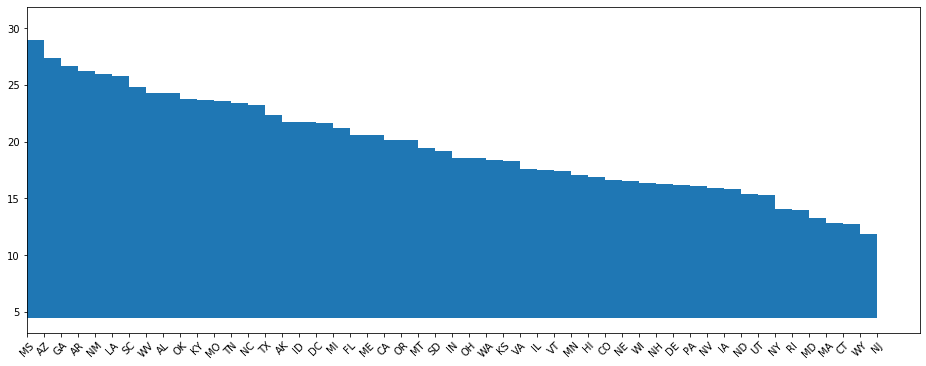

In [332]:
plt.figure(figsize=(16, 6))
plt.xticks(rotation=45)
plt.barh(poverty_by_state.poverty_rate, poverty_by_state["Geographic Area"])

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [333]:
df_pct_completed_hs.sample()

,Geographic Area,City,percent_completed_hs
13344,MS,Clarksdale city,79.3


In [334]:
type(df_pct_completed_hs.percent_completed_hs[0])

str

In [335]:
df_pct_completed_hs.percent_completed_hs = df_pct_completed_hs.percent_completed_hs.replace("-", 0)
type(df_pct_poverty.poverty_rate)

pandas.core.series.Series

In [336]:
df_pct_completed_hs["percent_completed_hs"] = pd.to_numeric(df_pct_completed_hs["percent_completed_hs"])
df_pct_completed_hs.iloc[573]

Geographic Area                  AL
City                    Whatley CDP
percent_completed_hs           0.00
Name: 573, dtype: object

In [337]:
graduation_by_state = df_pct_completed_hs.groupby("Geographic Area", as_index=False).agg({"percent_completed_hs":"mean"})
graduation_by_state = graduation_by_state.sort_values(by="percent_completed_hs", ascending=False)
graduation_by_state.head()

,Geographic Area,percent_completed_hs
19,MA,92.03
11,HI,91.67
6,CT,91.59
21,ME,91.43
30,NH,90.71


<BarContainer object of 51 artists>

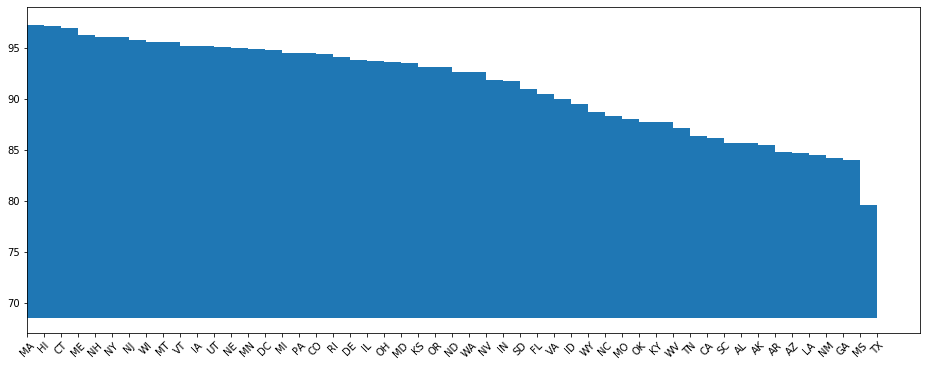

In [338]:
plt.figure(figsize=(16, 6))
plt.xticks(rotation=45)
plt.barh(graduation_by_state.percent_completed_hs, graduation_by_state["Geographic Area"])

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [339]:
poverty_by_state.head(1)

,Geographic Area,poverty_rate
25,MS,26.88


In [340]:
graduation_by_state.head(1)

,Geographic Area,percent_completed_hs
19,MA,92.03


In [341]:
poverty_vs_graduation = pd.merge(poverty_by_state, graduation_by_state, on="Geographic Area")
poverty_vs_graduation.head()

,Geographic Area,poverty_rate,percent_completed_hs
0,MS,26.88,78.47
1,AZ,25.27,79.22
2,GA,23.66,78.63
3,AR,22.96,79.95
4,NM,22.51,78.97


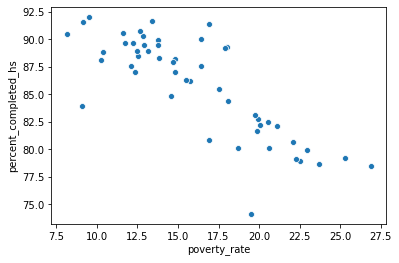

In [342]:
sns.scatterplot(poverty_vs_graduation.poverty_rate, poverty_vs_graduation.percent_completed_hs)

In [343]:
poverty_vs_graduation["ratio"] = round(poverty_vs_graduation.poverty_rate / poverty_vs_graduation.percent_completed_hs, 2)
poverty_vs_graduation.sample()

,Geographic Area,poverty_rate,percent_completed_hs,ratio
22,OR,16.44,87.60,0.19


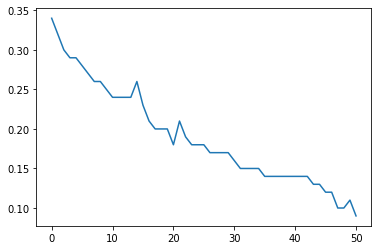

In [344]:
plt.plot(poverty_vs_graduation.ratio)

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

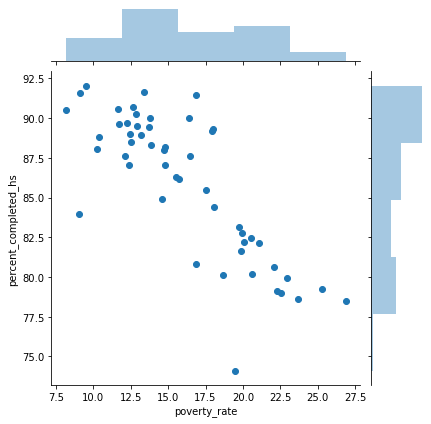

In [345]:
sns.jointplot(x="poverty_rate", y="percent_completed_hs", data=poverty_vs_graduation)

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

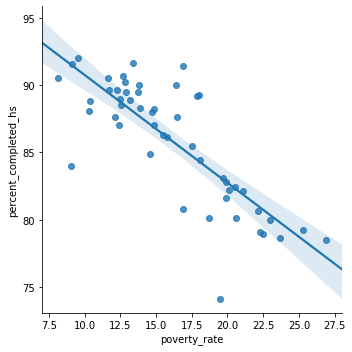

In [346]:
sns.lmplot(x="poverty_rate", y="percent_completed_hs", data=poverty_vs_graduation)

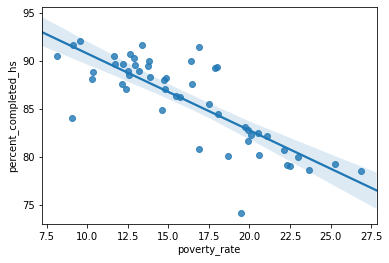

In [347]:
sns.regplot(x="poverty_rate", y="percent_completed_hs", data=poverty_vs_graduation)

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [348]:
df_share_race_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic area        29268 non-null  object
 1   City                   29268 non-null  object
 2   share_white            29268 non-null  object
 3   share_black            29268 non-null  object
 4   share_native_american  29268 non-null  object
 5   share_asian            29268 non-null  object
 6   share_hispanic         29268 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


In [349]:
df_share_race_city.iloc[630]

Geographic area                   AK
City                     Chisana CDP
share_white                      (X)
share_black                      (X)
share_native_american            (X)
share_asian                      (X)
share_hispanic                   (X)
Name: 630, dtype: object

In [350]:
df_share_race_city.share_white = df_share_race_city.share_white.replace("(X)", 0)
df_share_race_city.share_black = df_share_race_city.share_black.replace("(X)", 0)
df_share_race_city.share_native_american = df_share_race_city.share_native_american.replace("(X)", 0)
df_share_race_city.share_asian = df_share_race_city.share_asian.replace("(X)", 0)
df_share_race_city.share_hispanic = df_share_race_city.share_hispanic.replace("(X)", 0)

In [351]:
df_share_race_city.share_white = pd.to_numeric(df_share_race_city.share_white)
df_share_race_city.share_black = pd.to_numeric(df_share_race_city.share_black)
df_share_race_city.share_native_american = pd.to_numeric(df_share_race_city.share_native_american)
df_share_race_city.share_asian = pd.to_numeric(df_share_race_city.share_asian)
df_share_race_city.share_hispanic = pd.to_numeric(df_share_race_city.share_hispanic)

In [352]:
df_share_race_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Geographic area        29268 non-null  object 
 1   City                   29268 non-null  object 
 2   share_white            29268 non-null  float64
 3   share_black            29268 non-null  float64
 4   share_native_american  29268 non-null  float64
 5   share_asian            29268 non-null  float64
 6   share_hispanic         29268 non-null  float64
dtypes: float64(5), object(2)
memory usage: 1.6+ MB


In [353]:
race_by_state = df_share_race_city.groupby("Geographic area", as_index=False).agg({
    "share_white":"mean",
    "share_black":"mean",
    "share_native_american":"mean",
    "share_asian":"mean",
    "share_hispanic":"mean"
})
race_by_state.head()

,Geographic area,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AK,45.26,0.56,45.48,1.38,2.13
1,AL,72.51,23.32,0.66,0.48,2.98
2,AR,78.45,16.30,0.76,0.48,4.27
3,AZ,59.93,0.95,28.59,0.73,20.14
4,CA,71.54,2.68,1.72,5.54,29.51


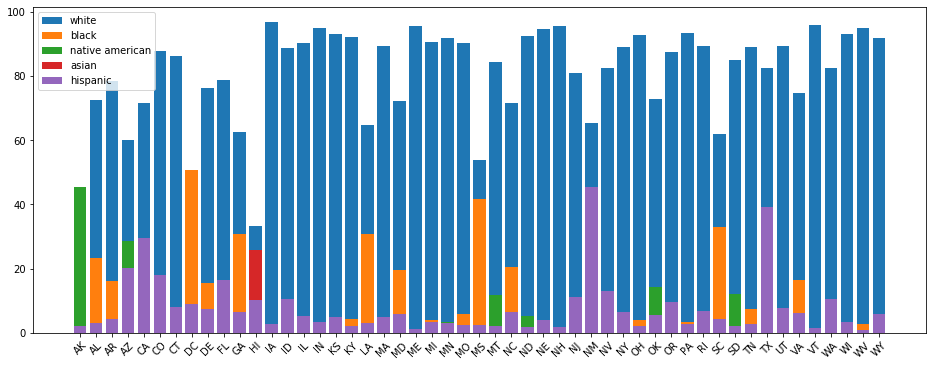

In [354]:
plt.figure(figsize=(16, 6))
plt.xticks(rotation=45)

plt.bar(race_by_state["Geographic area"], race_by_state.share_white, label="white")
plt.bar(race_by_state["Geographic area"], race_by_state.share_black, label="black")
plt.bar(race_by_state["Geographic area"], race_by_state.share_native_american, label="native american")
plt.bar(race_by_state["Geographic area"], race_by_state.share_asian, label="asian")
plt.bar(race_by_state["Geographic area"], race_by_state.share_hispanic, label="hispanic")

plt.legend()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [355]:
people_by_race = df_fatalities.groupby("race", as_index=False).agg({"id":"count"})
people_by_race

,race,id
0,0,195
1,A,39
2,B,618
3,H,423
4,N,31
5,O,28
6,W,1201


In [356]:
people_by_race = people_by_race.iloc[1:]
people_by_race

,race,id
1,A,39
2,B,618
3,H,423
4,N,31
5,O,28
6,W,1201


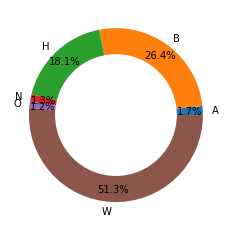

In [357]:
plt.pie(people_by_race.id, labels=people_by_race.race, autopct="%1.1f%%", pctdistance=0.85)

centre_circle = plt.Circle((0, 0), 0.70, fc="white")
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [358]:
people_by_gender = df_fatalities.groupby("gender", as_index=False).agg({"id":"count"})
people_by_gender

,gender,id
0,F,107
1,M,2428


([<matplotlib.patches.Wedge at 0x7fcf2cea59d0>,
 [Text(1.090343102724506, 0.14543699096549534, 'F'),
  Text(-1.0903431095329017, -0.14543693992285078, 'M')],
 [Text(0.5947326014860941, 0.07932926779936109, '4.2%'),
  Text(-0.5947326051997645, -0.0793292399579186, '95.8%')])

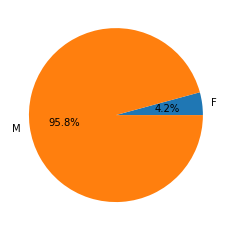

In [359]:
plt.pie(people_by_gender.id, labels=people_by_gender.gender, autopct="%1.1f%%")

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

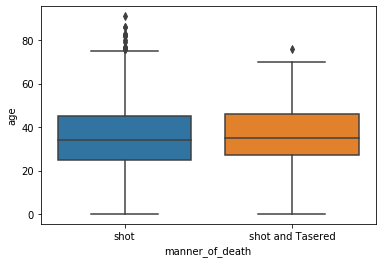

In [360]:
sns.boxplot(df_fatalities.manner_of_death, df_fatalities.age)

In [361]:
gender_vs_manner = df_fatalities.groupby(["gender", "manner_of_death"], as_index=False).agg({"id":"count"})
gender_vs_manner

,gender,manner_of_death,id
0,F,shot,102
1,F,shot and Tasered,5
2,M,shot,2261
3,M,shot and Tasered,167


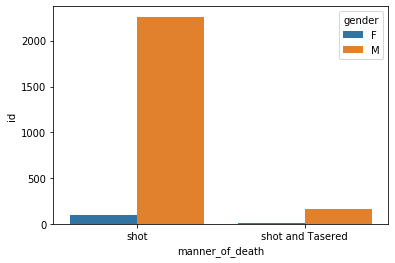

In [362]:
sns.barplot(gender_vs_manner.manner_of_death, gender_vs_manner.id, hue=gender_vs_manner.gender)

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [363]:
df_fatalities.armed.value_counts()

gun                                 1398
knife                                373
vehicle                              177
unarmed                              171
undetermined                         117
                                    ... 
straight edge razor                    1
baseball bat and fireplace poker       1
bean-bag gun                           1
chain                                  1
pen                                    1
Name: armed, Length: 69, dtype: int64

In [364]:
len(df_fatalities[df_fatalities.armed != "unarmed"]) / len(df_fatalities) * 100

93.25443786982248

In [365]:
df_weapon = df_fatalities[df_fatalities.armed != "unarmed"].groupby("armed", as_index=False).agg({"id":"count"})
df_weapon = df_weapon.iloc[1:]
df_weapon.head()

,armed,id
1,Taser,9
2,air conditioner,1
3,ax,9
4,baseball bat,8
5,baseball bat and bottle,1


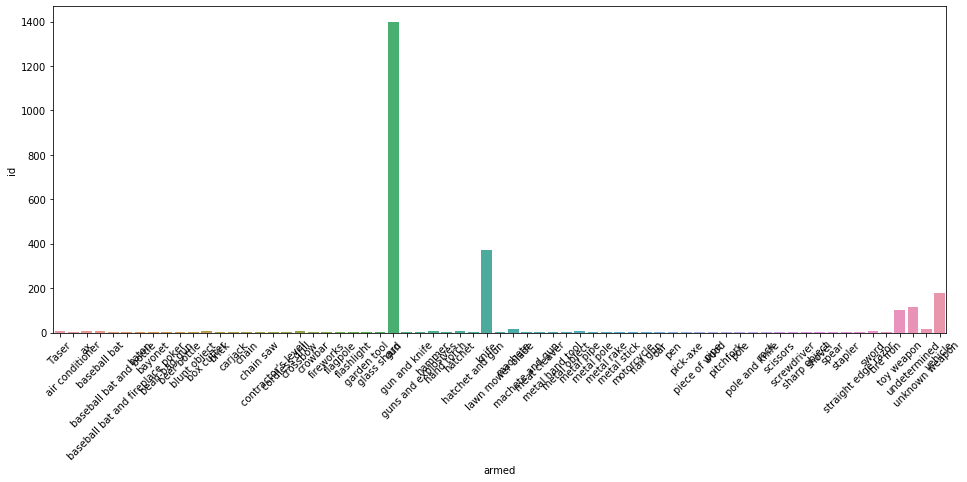

In [366]:
plt.figure(figsize=(16, 6))
plt.xticks(rotation=45)
sns.barplot(df_weapon.armed, df_weapon.id)

In [367]:
with_gun = df_weapon[df_weapon.armed == "gun"]
with_gun

,armed,id
26,gun,1398


In [368]:
unarmed = len(df_fatalities[df_fatalities.armed == "unarmed"])
unarmed

171

In [369]:
with_gun.id - unarmed

26    1227
Name: id, dtype: int64

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [370]:
len(df_fatalities[df_fatalities.age < 25]) / len(df_fatalities) * 100

20.78895463510848

Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

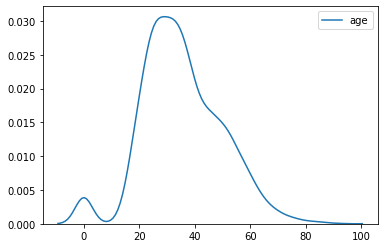

In [371]:
sns.kdeplot(df_fatalities.age)

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

In [372]:
df_fatalities.race.value_counts()

W    1201
B     618
H     423
0     195
A      39
N      31
O      28
Name: race, dtype: int64

In [373]:
df_fatalities_clean = df_fatalities[df_fatalities.race != 0]
df_fatalities_clean.race.value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

In [374]:
w = df_fatalities_clean[df_fatalities_clean.race == "W"]
b = df_fatalities_clean[df_fatalities_clean.race == "B"]
h = df_fatalities_clean[df_fatalities_clean.race == "H"]
a = df_fatalities_clean[df_fatalities_clean.race == "A"]
n = df_fatalities_clean[df_fatalities_clean.race == "N"]
o = df_fatalities_clean[df_fatalities_clean.race == "O"]

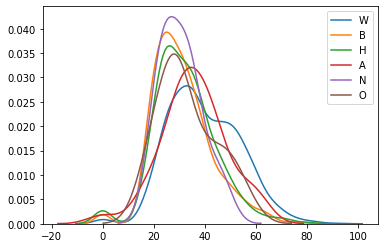

In [375]:
sns.kdeplot(w.age)
sns.kdeplot(b.age)
sns.kdeplot(h.age)
sns.kdeplot(a.age)
sns.kdeplot(n.age)
sns.kdeplot(o.age)

plt.legend(labels=["W", "B", "H", "A", "N", "O"])

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

([<matplotlib.patches.Wedge at 0x7fcf2d791610>,
 [Text(1.0984924880728215, 0.05756955486697999, 'A'),
  Text(0.6537112993774301, 0.8846816020842031, 'B'),
  Text(-0.7587954496625046, 0.7963852494687969, 'H'),
  Text(-1.0780641734599477, 0.218580964180599, 'N'),
  Text(-1.0919797775923425, 0.1325902158131515, 'O'),
  Text(-0.04576803321553019, -1.0990474453523753, 'W')])

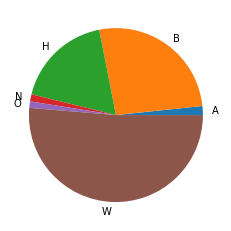

In [376]:
plt.pie(people_by_race.id, labels=people_by_race.race)

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [377]:
len(df_fatalities[df_fatalities.signs_of_mental_illness == True]) / len(df_fatalities) * 100

24.970414201183434

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [379]:
people_by_city = df_fatalities.groupby("city", as_index=False).agg({"id":"count"}).sort_values(by="id", ascending=False).head(10)
people_by_city

,city,id
732,Los Angeles,39
995,Phoenix,31
578,Houston,27
241,Chicago,25
687,Las Vegas,21
1118,San Antonio,20
284,Columbus,19
808,Miami,18
60,Austin,18
1217,St. Louis,15


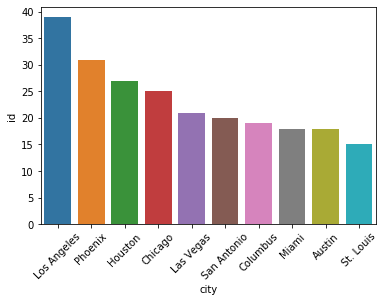

In [380]:
plt.xticks(rotation=45)
sns.barplot(people_by_city.city, people_by_city.id)

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [381]:
race_by_city = df_fatalities_clean[df_fatalities_clean.city.isin(people_by_city["city"])].groupby(["city", "race"], as_index=False).agg({"id":"count"})
race_by_city.head()

,city,race,id
0,Austin,B,3
1,Austin,H,2
2,Austin,W,13
3,Chicago,B,21
4,Chicago,H,1


In [382]:
rate_df = pd.merge(people_by_city, race_by_city, on="city", how="right")
rate_df.head()

,city,id_x,race,id_y
0,Austin,18,B,3
1,Austin,18,H,2
2,Austin,18,W,13
3,Chicago,25,B,21
4,Chicago,25,H,1


In [383]:
rate_df["rate"] = round(rate_df.id_y / rate_df.id_x, 2) * 100
rate_df.head()

,city,id_x,race,id_y,rate
0,Austin,18,B,3,17.00
1,Austin,18,H,2,11.00
2,Austin,18,W,13,72.00
3,Chicago,25,B,21,84.00
4,Chicago,25,H,1,4.00


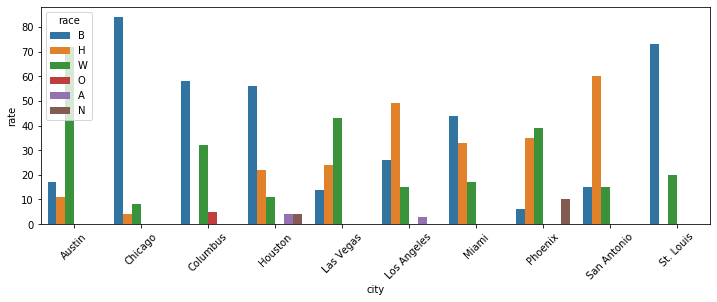

In [384]:
plt.figure(figsize=(12, 4))
plt.xticks(rotation=45)
sns.barplot(rate_df.city, rate_df.rate, hue=rate_df.race)

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [385]:
danger_cities = df_fatalities.groupby("city", as_index=False).agg({"id":"count"}).sort_values(by="id", ascending=False)
danger_cities

,city,id
732,Los Angeles,39
995,Phoenix,31
578,Houston,27
241,Chicago,25
687,Las Vegas,21
...,...,...
546,Healdton,1
543,Hawthorne,1
542,Hawaiian Gardens,1
541,Hattiesburg,1


In [386]:
dangerous_states = df_fatalities.groupby("state", as_index=False).agg({"id":"count"}).sort_values(by="id", ascending=False)
dangerous_states.head()

,state,id
4,CA,424
43,TX,225
9,FL,154
3,AZ,118
35,OH,79


In [387]:
px.choropleth(dangerous_states,
              locations="state",
              color="id",
              locationmode ="USA-states",
              color_continuous_scale="Viridis",
              scope="usa")

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [388]:
type(df_fatalities.date[0])

str

In [389]:
df_fatalities.date = pd.to_datetime(df_fatalities.date)
type(df_fatalities.date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [390]:
over_time = df_fatalities.groupby("date", as_index=False).agg({"id":"count"})
over_time.sample()

,date,id
245,2015-09-22,4


In [391]:
over_time["rolling_avg"] = over_time.id.rolling(10).mean()

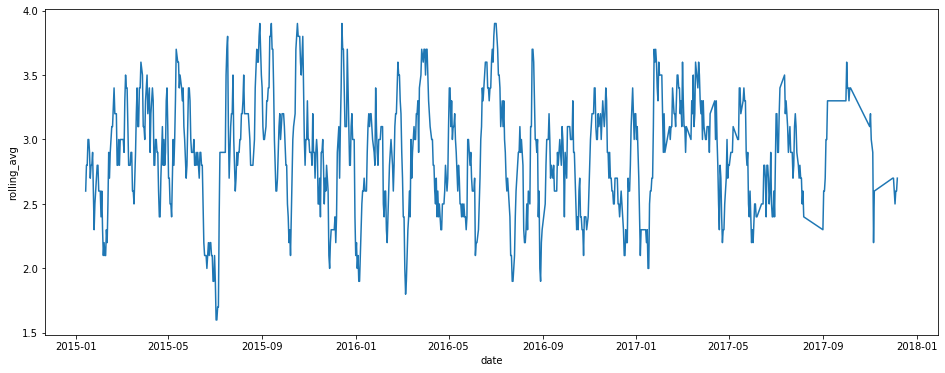

In [392]:
plt.figure(figsize=(16, 6))
sns.lineplot(over_time.date, over_time.rolling_avg)

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).

Fight on!